## 📊 Telecom Customer Churn Prediction

This project tackles the challenge of predicting customer churn — whether a user will leave a telecom company. Churn is costly for businesses, and early prediction enables customer retention strategies.

We use a real-world dataset with 4250 customer records and apply a full machine learning pipeline: data exploration, cleaning, feature engineering, encoding, modeling (CatBoost, Random Forest, Decision Tree), and performance evaluation using accuracy, precision, recall, and F1-score.

📁 Dataset Source: Provided as part of a machine learning course/homework assignment.

**Problem description:**
Predicting whether a customer will change telecommunications provider, something known as "churning".
Dataset info:
The training dataset contains 4250 samples. Each sample contains 19 features and 1 boolean variable "churn" which indicates the class of the sample. The 19 input features and 1 target variable are:

"state", string. 2-letter code of the US state of customer residence
"account_length", numerical. Number of months the customer has been with the current telco provider
"area_code", string = "area_code_AAA" where AAA = 3 digit area code.
"international_plan", (yes/no). The customer has international plan.
"voice_mail_plan", (yes/no). The customer has voice mail plan.
"number_vmail_messages", numerical. Number of voice-mail messages.
"total_day_minutes", numerical. Total minutes of day calls.
"total_day_calls", numerical. Total minutes of day calls.
"total_day_charge", numerical. Total charge of day calls.
"total_eve_minutes", numerical. Total minutes of evening calls.
"total_eve_calls", numerical. Total number of evening calls.
"total_eve_charge", numerical. Total charge of evening calls.
"total_night_minutes", numerical. Total minutes of night calls.
"total_night_calls", numerical. Total number of night calls.
"total_night_charge", numerical. Total charge of night calls.
"total_intl_minutes", numerical. Total minutes of international calls.
"total_intl_calls", numerical. Total number of international calls.
"total_intl_charge", numerical. Total charge of international calls
"number_customer_service_calls", numerical. Number of calls to customer service
"churn", (yes/no). Customer churn - target variable.
Your task is to :

Use some EDA techniques

Using Univariate variable analysis: Hint : use dataframe['feature'].unique()

Fix the problems on the features above

hint : Use df.replace from pandas, and df.apply
Detect skewed distribution on a numeric variable :

Use log/sqrt transformation on at least one variable with skewed distribution
hint : use np.log() or np.sqrt()
Detect missing values and handle them

Use Catboost Encoding (Count Encoding, Target Encoding) and compare the performance with One-Hot Encoding

Scale the numeric data (some of them)

Make train/test split : with train(70%), test(30%) with random_state = 0

Train the model

Evaluate the model

Achieve accuracy on test set >=0.90

For reproducibility please use random_state on train_test_split and model initialization

Write a summary :

Which model gives the best result?
Which encoding give better performance on this dataset (CatBoost or One-Hot)?
Bonus points :

Add precision/recall evaluation

Hint : use: from sklearn.metrics import classification_report

General Support : For converting feature to numeric value use : pd.to_numeric(dataset[feature], errors='coerce')

<h3 style="color:blue;"><b>1. Import Libraries</b></h3>

In [49]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from category_encoders import CatBoostEncoder
from category_encoders import TargetEncoder, CountEncoder
from sklearn.preprocessing import OneHotEncoder
from category_encoders import OneHotEncoder
from catboost import CatBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

<h3 style="color:blue;"><b>2. Load the Dataset</b></h3>


In [50]:
df = pd.read_csv("dataset-hw2.csv")

In [51]:
df.shape

(4250, 20)

<h3 style="color:blue;"><b>3. Initial Exploration</b></h3>


In [52]:
df.head(5)

,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn
0,OH,107,area_code_415,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,no
1,NJ,137,area_code_415,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,no
2,OH,84,area_code_408,yes,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,no
3,OK,75,area_code_415,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,no
4,MA,121,area_code_510,no,yes,24,218.2,88,37.09,348.5,108,29.62,212.6,118,9.57,7.5,7,2.03,3,no


In [53]:
df.dtypes

state                             object
account_length                     int64
area_code                         object
international_plan                object
voice_mail_plan                   object
number_vmail_messages              int64
total_day_minutes                float64
total_day_calls                    int64
total_day_charge                 float64
total_eve_minutes                float64
total_eve_calls                    int64
total_eve_charge                 float64
total_night_minutes              float64
total_night_calls                  int64
total_night_charge               float64
total_intl_minutes               float64
total_intl_calls                   int64
total_intl_charge                float64
number_customer_service_calls      int64
churn                             object
dtype: object

In [54]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4250 entries, 0 to 4249
Data columns (total 20 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   state                          4250 non-null   object 
 1   account_length                 4250 non-null   int64  
 2   area_code                      4250 non-null   object 
 3   international_plan             4250 non-null   object 
 4   voice_mail_plan                4250 non-null   object 
 5   number_vmail_messages          4250 non-null   int64  
 6   total_day_minutes              4250 non-null   float64
 7   total_day_calls                4250 non-null   int64  
 8   total_day_charge               4250 non-null   float64
 9   total_eve_minutes              4250 non-null   float64
 10  total_eve_calls                4250 non-null   int64  
 11  total_eve_charge               4250 non-null   float64
 12  total_night_minutes            4250 non-null   f

In [55]:
df.describe()

,account_length,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls
count,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000
mean,100.236235,7.631765,180.259600,99.907294,30.644682,200.173906,100.176471,17.015012,200.527882,99.839529,9.023892,10.256071,4.426353,2.769654,1.559059
std,39.698401,13.439882,54.012373,19.850817,9.182096,50.249518,19.908591,4.271212,50.353548,20.093220,2.265922,2.760102,2.463069,0.745204,1.311434
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,73.000000,0.000000,143.325000,87.000000,24.365000,165.925000,87.000000,14.102500,167.225000,86.000000,7.522500,8.500000,3.000000,2.300000,1.000000
50%,100.000000,0.000000,180.450000,100.000000,30.680000,200.700000,100.000000,17.060000,200.450000,100.000000,9.020000,10.300000,4.000000,2.780000,1.000000
75%,127.000000,16.000000,216.200000,113.000000,36.750000,233.775000,114.000000,19.867500,234.700000,113.000000,10.560000,12.000000,6.000000,3.240000,2.000000
max,243.000000,52.000000,351.500000,165.000000,59.760000,359.300000,170.000000,30.540000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000


In [56]:
churn_df = df['churn'].value_counts().reset_index()
churn_df.columns = ['churn', 'count']
print(churn_df)

  churn  count
0    no   3652
1   yes    598


In [57]:
df.duplicated().sum()

np.int64(0)

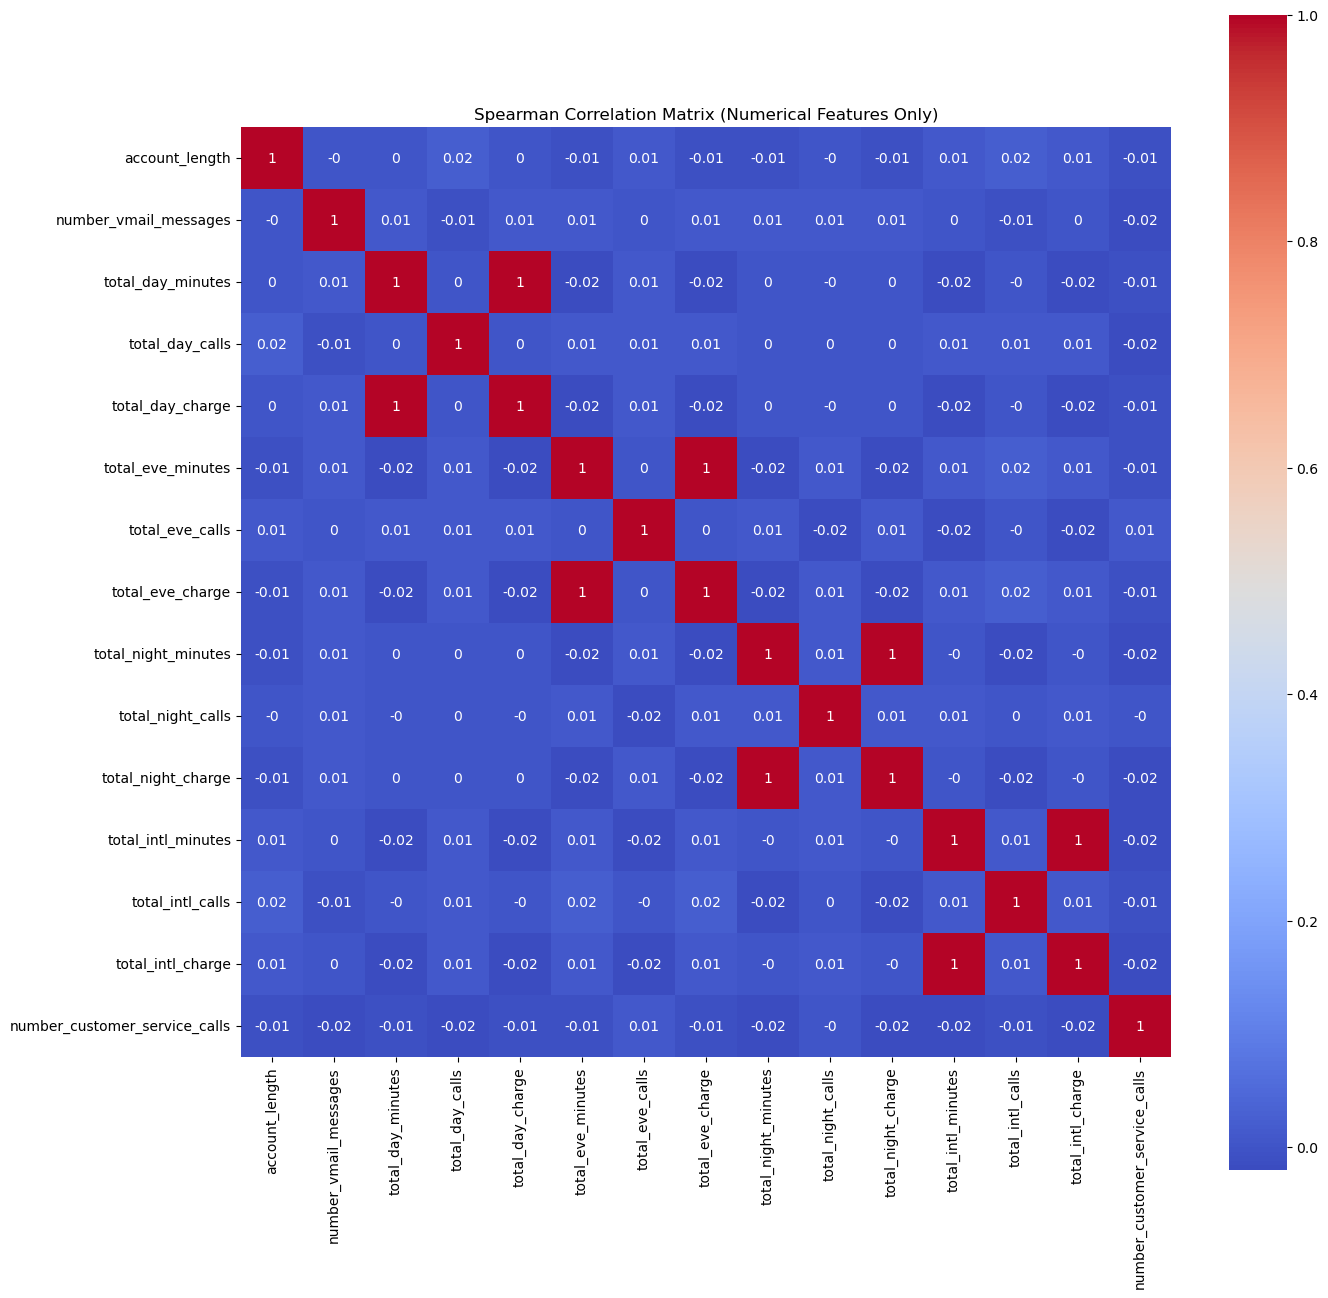

In [58]:
# Step 1: Select only numerical columns
numeric_df = df.select_dtypes(include=[np.number])

# Step 2: Compute Spearman correlation matrix and round values
df_corr = numeric_df.corr(method='spearman').round(2)

# Step 3: Plot the heatmap
plt.figure(figsize=(15, 15))
sns.heatmap(df_corr, annot=True, cmap='coolwarm', square=True)
plt.title("Spearman Correlation Matrix (Numerical Features Only)")
plt.show()

> 📌 **The Spearman Correlation Matrix helps us understand the relationships between numerical features, especially monotonic trends, which is useful even when relationships are not strictly linear.**

> **Key Takeaways:**

>**◉ Perfect correlations (ρ = 1.0) between:**

>total_day_minutes and total_day_charge

>total_eve_minutes and total_eve_charge

>total_night_minutes and total_night_charge

>total_intl_minutes and total_intl_charge

>These are expected, as charges are directly calculated from minutes. Including both in the model can cause multicollinearity — we can keep one from each pair to reduce redundancy.

>**◉ Weak correlation with churn indicators:**

>number_customer_service_calls has low correlation with other features, but it might still have high predictive value for churn.

>This highlights that not all important predictors show strong correlation, especially when relationships are non-linear or categorical.

>**The model can benefit from combining several weak predictors rather than relying on any single strong one.**
>Since no single feature is highly predictive of churn, this model should learn from the combined effect of many small signals.

>For example:

>A customer with medium usage, high service calls, and no international plan might be likely to churn — but no one feature alone predicts that.

>**◉ Handling highly correlated features:**

>The columns with high correlation will be retained because tree-based models such as CatBoost, Decision Tree, and Random Forest will be used — models that are generally robust to multicollinearity. These algorithms naturally handle redundancy by focusing on the most informative features during training, so removing highly correlated feature pairs is not strictly necessary in this context.

<h3 style="color:blue;"><b>4. Univariate Analysis + Feature Fixing</b></h3>


In [59]:
for feature in df.columns:
    print("Feature:", feature)
    print(df[feature].unique())
    print("------------------------------")

Feature: state
['OH' 'NJ' 'OK' 'MA' 'MO' 'LA' 'WV' 'IN' 'RI' 'IA' 'MT' 'NY' 'ID' 'VA'
 'TX' 'FL' 'CO' 'AZ' 'SC' 'WY' 'HI' 'NH' 'AK' 'GA' 'MD' 'AR' 'WI' 'OR'
 'MI' 'DE' 'UT' 'CA' 'SD' 'NC' 'WA' 'MN' 'NM' 'NV' 'DC' 'VT' 'KY' 'ME'
 'MS' 'AL' 'NE' 'KS' 'TN' 'IL' 'PA' 'CT' 'ND']
------------------------------
Feature: account_length
[107 137  84  75 121 147 117 141  65  74 168  95 161  85  76  73  77 130
 111 132  57  54  20  49  12  36  78 136  98 135  34 160  64  59 142  97
  52  60  10  96  81 125 174 116 149  38  40  43 113 126 150 138 162  90
  50  82 144  46  70 128  94 155  80  99 120 108 122  93 157  63  41 193
  61  92 163  91 127 110 103 145  56 151  83 139   6 115  62 185 148  32
  68  25 179  67  19 170 106  51 118 208 131  53 105  66  35  88 123  45
 100 215  22  33  86 114  24 119 101 146 143  48 167  89 199 166 158 196
 112 209  16  39 104 129  55  44  79 159 194  87  21 133 224 140  58 109
  71  72 124 102 165  18  30 190  47 152  26  69  31 186 171  28 153 172
 169  13 189 

In [60]:
# "area_code" feature is in string format and contains the prefix "area_code_". We can fix this by splitting the string and keeping only the area code as an integer.
# the "international_plan", and "voice_mail_plan" features are in string format and contain "yes" or "no". We can fix this by replacing "yes" with 1 and "no" with 0.
# the target column "churn" is in string format and contain "yes" or "no". We can fix this by replacing "yes" with 1 and "no" with 0.

In [61]:
df['area_code'] = df['area_code'].apply(lambda x: int(str(x).split('_')[-1]) if 'area_code_' in str(x) else int(x))
# Convert yes/no to binary 0/1
df['international_plan'] = df['international_plan'].replace({'yes': 1, 'no': 0}).astype(int)
df['voice_mail_plan'] = df['voice_mail_plan'].replace({'yes': 1, 'no': 0}).astype(int)
df['churn'] = df['churn'].replace({'yes': 1, 'no': 0}).astype(int)

In [62]:
print(df[['area_code', 'international_plan', 'voice_mail_plan', 'churn']].head())

   area_code  international_plan  voice_mail_plan  churn
0        415                   0                1      0
1        415                   0                0      0
2        408                   1                0      0
3        415                   1                0      0
4        510                   0                1      0


<h3 style="color:blue;"><b>5. Check for Missing Values</b></h3>


In [63]:
# 1. Check for missing values BEFORE any conversion
print("🔍Initial missing values:\n", df.isnull().sum())

# 2. Convert only numeric columns safely
numeric_cols = df.select_dtypes(include=['number', 'float64', 'int64']).columns
df[numeric_cols] = df[numeric_cols].apply(pd.to_numeric, errors='coerce')

# 3. Fill missing values in numeric columns with 0 (or any other strategy you prefer)
df[numeric_cols] = df[numeric_cols].fillna(0)

# 4. Check again to confirm
print("\n✅ Missing values after cleaning:\n", df.isnull().sum())


🔍Initial missing values:
 state                            0
account_length                   0
area_code                        0
international_plan               0
voice_mail_plan                  0
number_vmail_messages            0
total_day_minutes                0
total_day_calls                  0
total_day_charge                 0
total_eve_minutes                0
total_eve_calls                  0
total_eve_charge                 0
total_night_minutes              0
total_night_calls                0
total_night_charge               0
total_intl_minutes               0
total_intl_calls                 0
total_intl_charge                0
number_customer_service_calls    0
churn                            0
dtype: int64

✅ Missing values after cleaning:
 state                            0
account_length                   0
area_code                        0
international_plan               0
voice_mail_plan                  0
number_vmail_messages            0
total_day_minute

<h3 style="color:blue;"><b>6. Skewed Distribution Handling</b></h3>

In [64]:
#Skewed distributions can negatively affect the performance of some machine learning algorithms, so it's important to identify them and handle them appropriately.

In [65]:
numeric_cols = ['account_length', 'number_vmail_messages', 'total_day_minutes', 'total_day_calls',
                'total_day_charge', 'total_eve_minutes', 'total_eve_calls', 'total_eve_charge',
                'total_night_minutes', 'total_night_calls', 'total_night_charge', 'total_intl_minutes',
                'total_intl_calls', 'total_intl_charge', 'number_customer_service_calls']

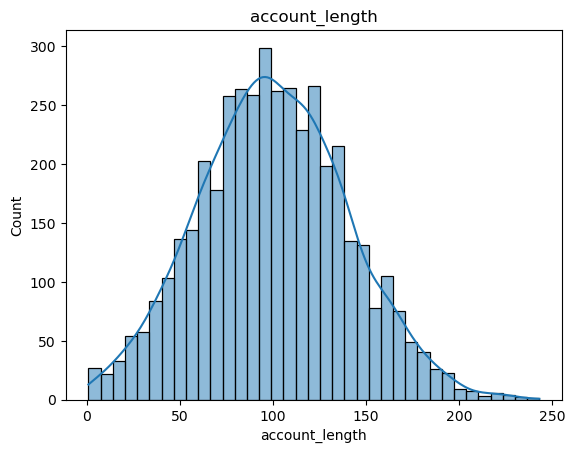

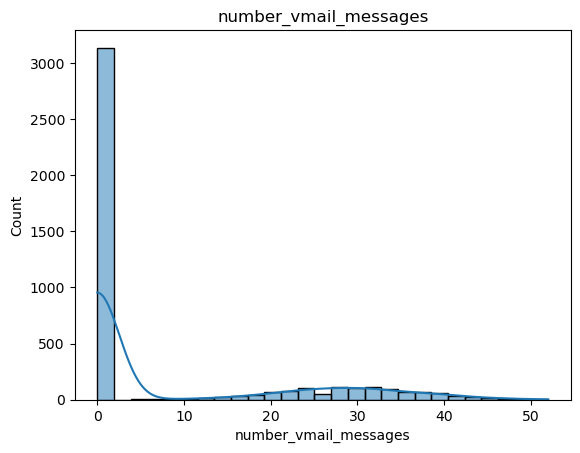

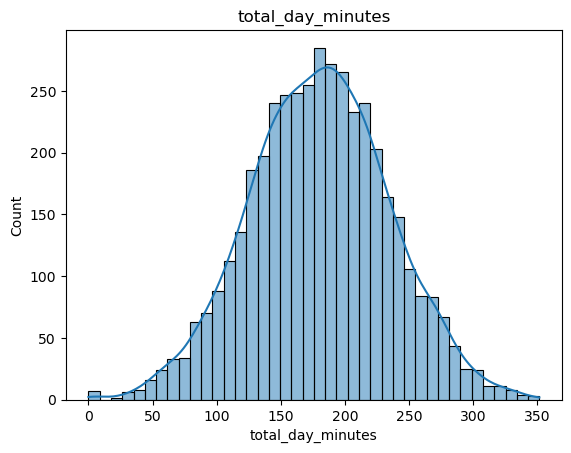

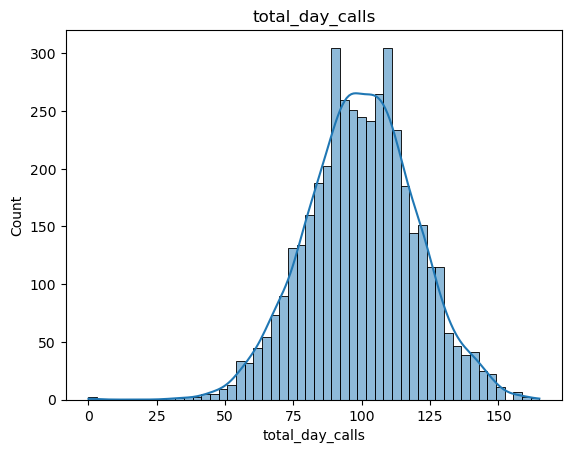

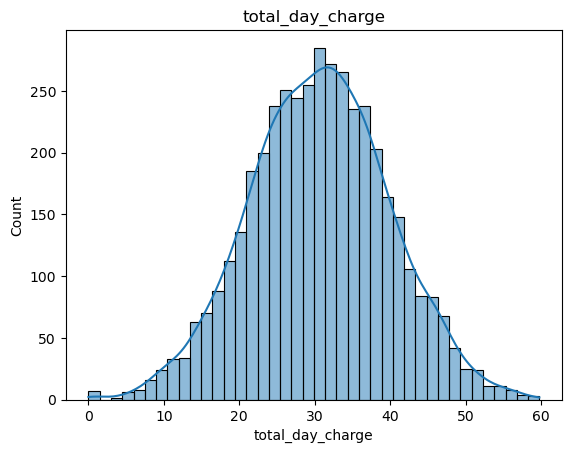

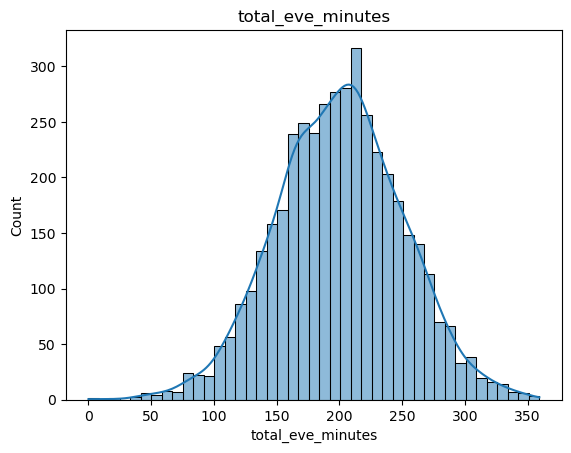

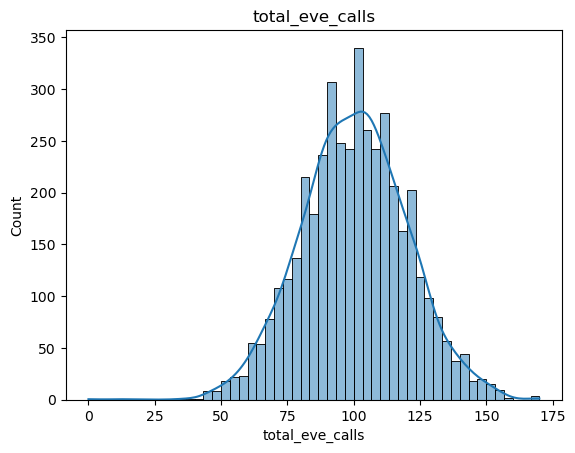

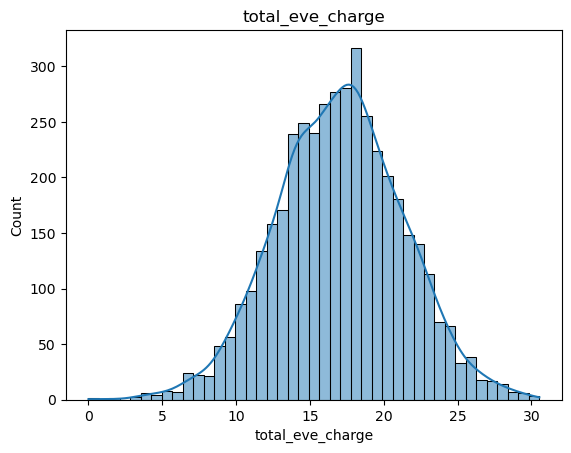

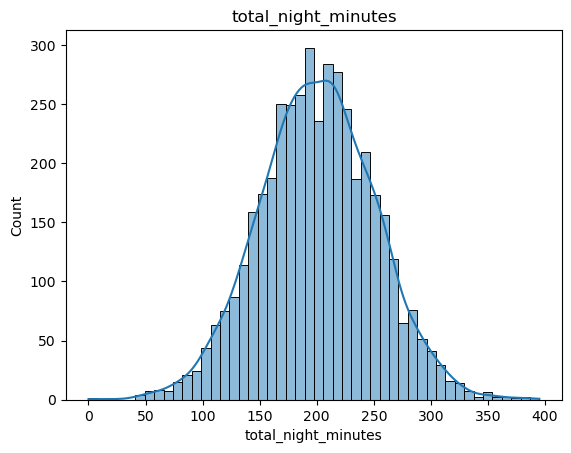

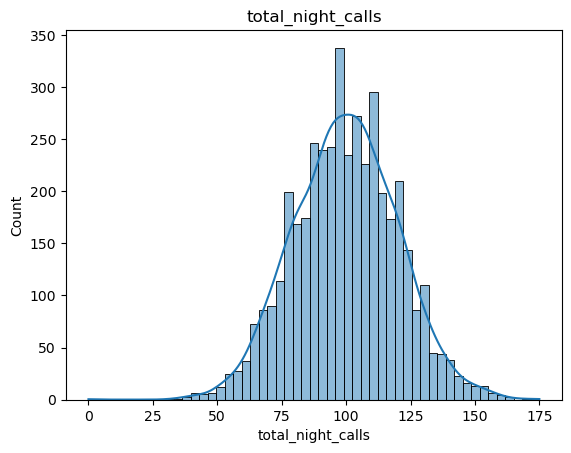

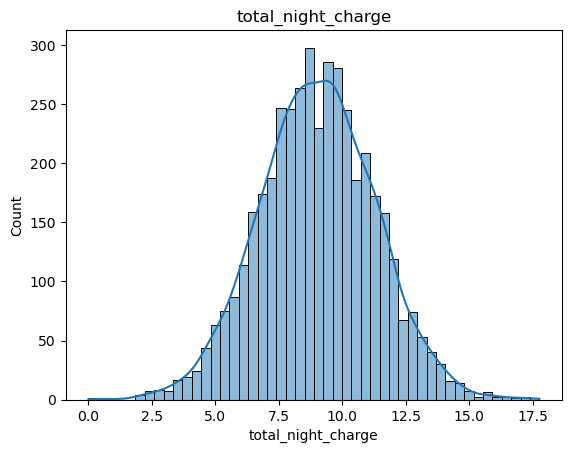

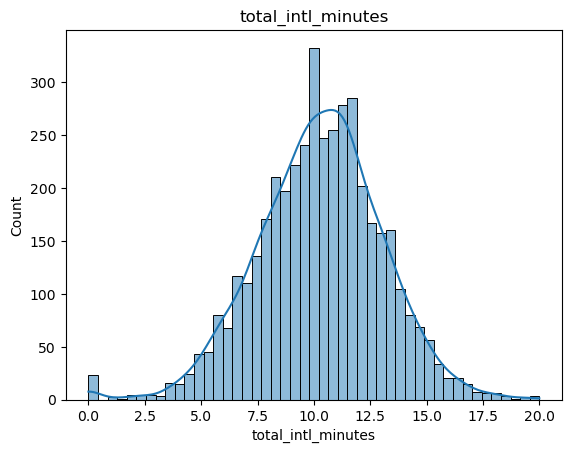

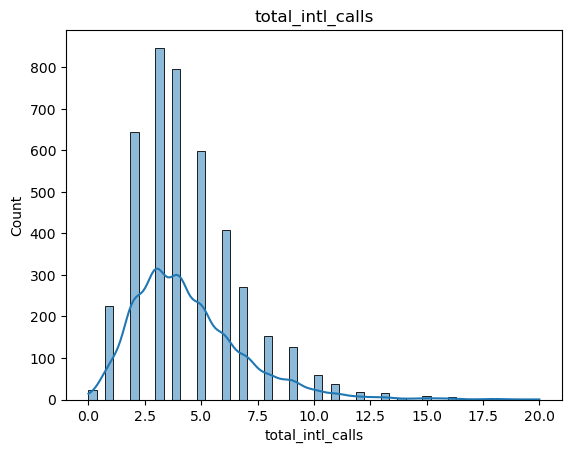

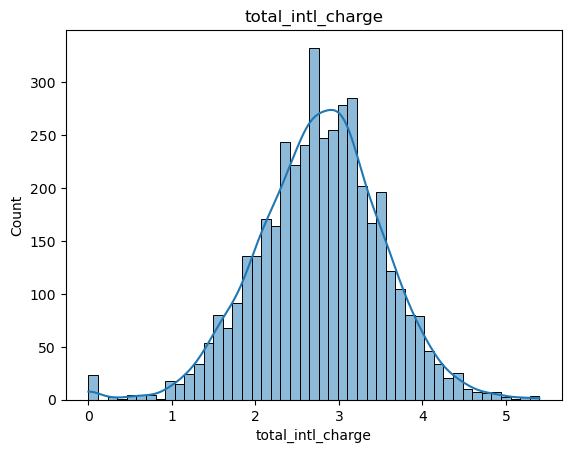

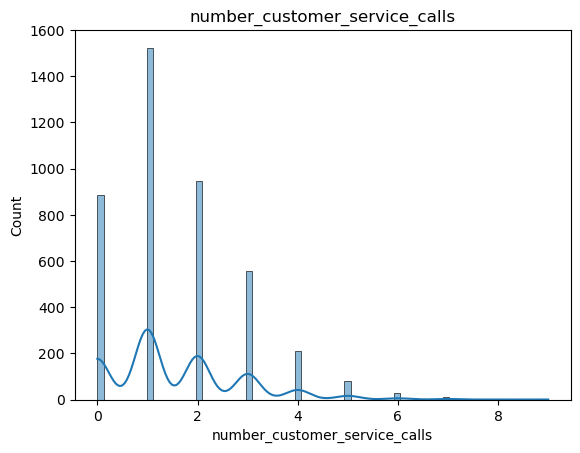

In [66]:
for col in numeric_cols:
    plt.figure()
    sns.histplot(df[col],kde=True)
    plt.title(col)
    plt.show()

In [67]:
for col in numeric_cols:
    print(f"{col} skewness: {df[col].skew()}")

account_length skewness: 0.12232732438422539
number_vmail_messages skewness: 1.373091038123339
total_day_minutes skewness: -0.006910229800877682
total_day_calls skewness: -0.08581246336912247
total_day_charge skewness: -0.0069125262282953735
total_eve_minutes skewness: -0.030414586244988526
total_eve_calls skewness: -0.020811823634835278
total_eve_charge skewness: -0.03038789084081965
total_night_minutes skewness: 0.008490819348496867
total_night_calls skewness: 0.005273110226931511
total_night_charge skewness: 0.008444754040695448
total_intl_minutes skewness: -0.2413595393894869
total_intl_calls skewness: 1.360122209275675
total_intl_charge skewness: -0.2416706660676994
number_customer_service_calls skewness: 1.0826915855656591


### 📊 Skewness Value Interpretation
| **Skewness Value** | **Interpretation**                              |
|--------------------|--------------------------------------------------|
| ≈ 0                | Symmetrical (normal-like distribution)           |
| > 0 (positive)     | Right-skewed (tail on the right)                 |
| < 0 (negative)     | Left-skewed (tail on the left)                   |
| > 1 or < -1        | Highly skewed — likely needs transformation      |

In [69]:
for col in numeric_cols:
    skew_val = df[col].skew()
    if abs(skew_val) > 1:
        print(f"{col} skewness: {skew_val:.2f}")

number_vmail_messages skewness: 1.37
total_intl_calls skewness: 1.36
number_customer_service_calls skewness: 1.08


In [70]:
#some numeric variables have skewed distributions, so we can use log or square root transformation to fix the skewness

<h4 style="color:green;">Log Transform</h4>

In [71]:
# ✅ Log transform: number of voice mail messages
df['log_number_vmail_messages'] = np.log(df['number_vmail_messages'] + 1)
print("Skewness after log transformation (number_vmail_messages):", df['log_number_vmail_messages'].skew())

# ✅ Log transform: total international calls
df['total_intl_calls_log'] = np.log1p(df['total_intl_calls'])
print("Skewness after log transformation (total_intl_calls):", df['total_intl_calls_log'].skew())

Skewness after log transformation (number_vmail_messages): 1.1175542573244095
Skewness after log transformation (total_intl_calls): -0.1768110893025707


<h4 style="color:green;">Square Root</h4>

In [72]:
df['sqrt_customer_service_calls'] = np.sqrt(df['number_customer_service_calls'])

# Check new skewness
print("Skewness after sqrt transformation:", df['sqrt_customer_service_calls'].skew())

Skewness after sqrt transformation: -0.3806849790513572


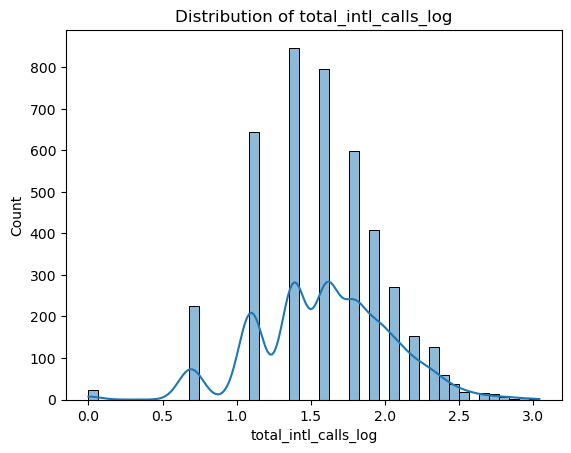

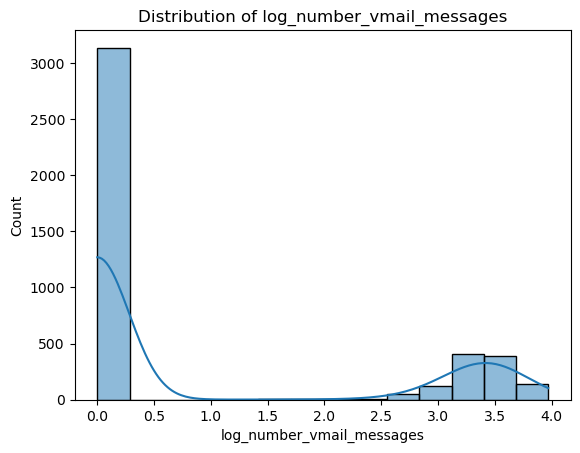

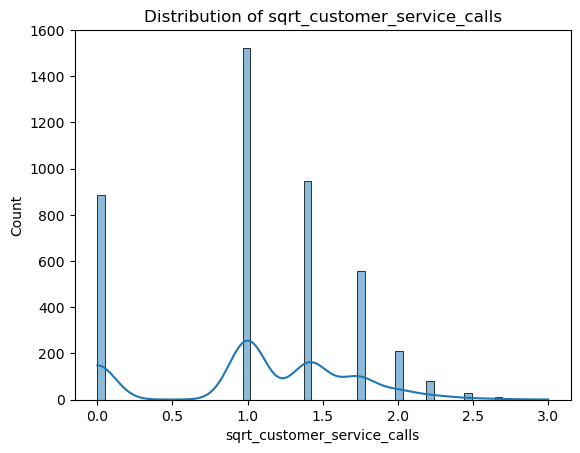

In [73]:
# List of columns to plot
cols_to_plot = ['total_intl_calls_log', 'log_number_vmail_messages', 'sqrt_customer_service_calls']

for col in cols_to_plot:
    plt.figure()
    sns.histplot(df[col], kde=True)
    plt.title(f'Distribution of {col}')
    plt.show()

<h3 style="color:blue;"><b>7. Encoding categorical features</b></h3>

In [74]:
df.dtypes

state                             object
account_length                     int64
area_code                          int64
international_plan                 int64
voice_mail_plan                    int64
number_vmail_messages              int64
total_day_minutes                float64
total_day_calls                    int64
total_day_charge                 float64
total_eve_minutes                float64
total_eve_calls                    int64
total_eve_charge                 float64
total_night_minutes              float64
total_night_calls                  int64
total_night_charge               float64
total_intl_minutes               float64
total_intl_calls                   int64
total_intl_charge                float64
number_customer_service_calls      int64
churn                              int64
log_number_vmail_messages        float64
total_intl_calls_log             float64
sqrt_customer_service_calls      float64
dtype: object

<h4 style="color:green;">One-Hot Encoding and CatBoost Encoding</h4>

In [75]:
# Split the dataset into training and testing sets
X = df.drop(columns=['churn'])
y = df['churn']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# One-hot encode the categorical variables
onehot_encoder = OneHotEncoder(handle_unknown='ignore')
X_train_onehot = onehot_encoder.fit_transform(X_train.select_dtypes(include=['object']))
X_test_onehot = onehot_encoder.transform(X_test.select_dtypes(include=['object']))

# Fit a random forest classifier using one-hot encoded features
rf_onehot = RandomForestClassifier(random_state=0)
rf_onehot.fit(X_train_onehot, y_train)
y_pred_onehot = rf_onehot.predict(X_test_onehot)
acc_onehot = accuracy_score(y_test, y_pred_onehot)
print(f'One-hot encoding accuracy: {acc_onehot:.2f}')

# CatBoost encode the categorical variables
catboost_encoder = CatBoostEncoder()
X_train_catboost = catboost_encoder.fit_transform(X_train.select_dtypes(include=['object']), y_train)
X_test_catboost = catboost_encoder.transform(X_test.select_dtypes(include=['object']))

# Fit a random forest classifier using CatBoost encoded features
rf_catboost = RandomForestClassifier(random_state=0)
rf_catboost.fit(X_train_catboost, y_train)
y_pred_catboost = rf_catboost.predict(X_test_catboost)
acc_catboost = accuracy_score(y_test, y_pred_catboost)
print(f'CatBoost encoding accuracy: {acc_catboost:.2f}')

One-hot encoding accuracy: 0.86
CatBoost encoding accuracy: 0.81


> 📌 **The one-hot encoding has better performance:**  
> The model trained on **one-hot encoded** features predicted correctly **86%** of the time,  
> while the one using **CatBoostEncoder** predicted correctly **81%** of the time.

In [76]:
# Define categorical features
cat_features = ['state']

# Apply One-Hot Encoding to 'state'
one_hot_encoders = OneHotEncoder(use_cat_names=True, handle_unknown='ignore')
new_data = one_hot_encoders.fit_transform(X[cat_features],y).add_suffix("_one_hot")

# Join the new encoded columns to the original dataframe
df_ = df.join(new_data)
df_.head(5)

,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,...,state_ME_one_hot,state_MS_one_hot,state_AL_one_hot,state_NE_one_hot,state_KS_one_hot,state_TN_one_hot,state_IL_one_hot,state_PA_one_hot,state_CT_one_hot,state_ND_one_hot
0,OH,107,415,0,1,26,161.6,123,27.47,195.5,...,0,0,0,0,0,0,0,0,0,0
1,NJ,137,415,0,0,0,243.4,114,41.38,121.2,...,0,0,0,0,0,0,0,0,0,0
2,OH,84,408,1,0,0,299.4,71,50.90,61.9,...,0,0,0,0,0,0,0,0,0,0
3,OK,75,415,1,0,0,166.7,113,28.34,148.3,...,0,0,0,0,0,0,0,0,0,0
4,MA,121,510,0,1,24,218.2,88,37.09,348.5,...,0,0,0,0,0,0,0,0,0,0


In [77]:
# Drop the original 'state' column to avoid duplication
df = df_.drop(['state'], axis = 'columns')

In [78]:
df.head(5)

,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,...,state_ME_one_hot,state_MS_one_hot,state_AL_one_hot,state_NE_one_hot,state_KS_one_hot,state_TN_one_hot,state_IL_one_hot,state_PA_one_hot,state_CT_one_hot,state_ND_one_hot
0,107,415,0,1,26,161.6,123,27.47,195.5,103,...,0,0,0,0,0,0,0,0,0,0
1,137,415,0,0,0,243.4,114,41.38,121.2,110,...,0,0,0,0,0,0,0,0,0,0
2,84,408,1,0,0,299.4,71,50.90,61.9,88,...,0,0,0,0,0,0,0,0,0,0
3,75,415,1,0,0,166.7,113,28.34,148.3,122,...,0,0,0,0,0,0,0,0,0,0
4,121,510,0,1,24,218.2,88,37.09,348.5,108,...,0,0,0,0,0,0,0,0,0,0


<h3 style="color:blue;"><b>8. Feature Scaling</b></h3>

In [79]:
scaler = StandardScaler()
df[numeric_cols] = scaler.fit_transform(df[numeric_cols])
print('Standard Scaller applied on the data')

Standard Scaller applied on the data


<h3 style="color:blue;"><b>9. Train/Test Split - Train the model, Evaluate the model - OneHotEncoding - CatBoostClassifier</b></h3>

In [80]:
# Split the dataset into train and test sets
X_cbc = df.drop('churn', axis=1)
y_cbc = df['churn']
X_train_cbc, X_test_cbc, y_train_cbc, y_test_cbc = train_test_split(X_cbc, y_cbc, test_size=0.3, random_state=0)

# Train the model using the Catboost algorithm
model_cbc = CatBoostClassifier()
model_cbc.fit(X_train_cbc, y_train_cbc)

# Evaluate the model
from sklearn.metrics import accuracy_score
y_pred_cbc = model_cbc.predict(X_test_cbc)
accuracy_cbc = accuracy_score(y_test_cbc, y_pred_cbc)
print("Accuracy on test set: ", accuracy_cbc)

Learning rate set to 0.01641
0:	learn: 0.6759692	total: 6.46ms	remaining: 6.45s
1:	learn: 0.6589755	total: 12.4ms	remaining: 6.18s
2:	learn: 0.6401880	total: 17.4ms	remaining: 5.78s
3:	learn: 0.6236032	total: 22.6ms	remaining: 5.62s
4:	learn: 0.6068720	total: 26.5ms	remaining: 5.28s
5:	learn: 0.5932790	total: 30.4ms	remaining: 5.03s
6:	learn: 0.5808610	total: 33.3ms	remaining: 4.72s
7:	learn: 0.5680886	total: 36.5ms	remaining: 4.52s
8:	learn: 0.5540560	total: 39.9ms	remaining: 4.39s
9:	learn: 0.5428911	total: 43.7ms	remaining: 4.32s
10:	learn: 0.5295177	total: 47.3ms	remaining: 4.25s
11:	learn: 0.5188360	total: 50.3ms	remaining: 4.14s
12:	learn: 0.5064084	total: 53.3ms	remaining: 4.05s
13:	learn: 0.4962465	total: 56.7ms	remaining: 3.99s
14:	learn: 0.4870115	total: 59.7ms	remaining: 3.92s
15:	learn: 0.4770457	total: 62.9ms	remaining: 3.87s
16:	learn: 0.4683484	total: 66ms	remaining: 3.82s
17:	learn: 0.4584259	total: 68.8ms	remaining: 3.75s
18:	learn: 0.4499731	total: 71.8ms	remaining: 3

<h3 style="color:blue;"><b>10. Train/Test Split - Train the model, Evaluate the model - OneHotEncoding - DecisionTreeClassifier</b></h3>

In [81]:
# Split the dataset into train and test sets
X_dt = df.drop('churn', axis=1)
y_dt = df['churn']
X_train_dt, X_test_dt, y_train_dt, y_test_dt = train_test_split(X_dt, y_dt, test_size=0.3, random_state=0)

# Train the model using the DecisionTreeClassifier algorithm
model_dt = DecisionTreeClassifier(max_depth=15, 
                              min_samples_leaf=7, 
                              max_leaf_nodes=50, 
                              criterion='entropy')

model_dt.fit(X_train_dt, y_train_dt)

# Evaluate the model
from sklearn.metrics import accuracy_score
y_pred_dt = model_dt.predict(X_test_dt)
accuracy_dt = accuracy_score(y_test_dt, y_pred_dt)
print("Accuracy on test set: ", accuracy_dt)

Accuracy on test set:  0.952156862745098


<h3 style="color:blue;"><b>11. Train/Test Split - Train the model, Evaluate the model - OneHotEncoding - RandomForestClassifier</b></h3>

In [82]:
# Perform one-hot encoding on the dataset
X_rf = pd.get_dummies(df.drop('churn', axis=1))

# Split the dataset into train and test sets
y_rf = df['churn']
X_train_rf, X_test_rf, y_train_rf, y_test_rf = train_test_split(X_rf, y_rf, test_size=0.3, random_state=0)

# Train the model using the RandomForestClassifier algorithm
from sklearn.ensemble import RandomForestClassifier
model_rf = RandomForestClassifier(n_estimators=100, 
                                   max_depth=15, 
                                   min_samples_leaf=7, 
                                   max_leaf_nodes=50, 
                                   criterion='entropy')

model_rf.fit(X_train_rf, y_train_rf)

# Evaluate the model
from sklearn.metrics import accuracy_score
y_pred_rf = model_rf.predict(X_test_rf)
accuracy_rf = accuracy_score(y_test_rf, y_pred_rf)
print("Accuracy on test set: ", accuracy_rf)

Accuracy on test set:  0.9231372549019607


<h3 style="color:blue;"><b>12. Precision/recall evaluation</b></h3>

<h4 style="color:green;">CatBoostClassifier</h4>

In [83]:
y_pred_cbc = model_cbc.predict(X_test_cbc)
print(classification_report(y_test_cbc, y_pred_cbc))

              precision    recall  f1-score   support

           0       0.97      1.00      0.98      1102
           1       0.97      0.81      0.88       173

    accuracy                           0.97      1275
   macro avg       0.97      0.90      0.93      1275
weighted avg       0.97      0.97      0.97      1275



<h4 style="color:green;">DecisionTreeClassifier</h4>

In [84]:
y_pred_dt = model_dt.predict(X_test_dt)
print(classification_report(y_test_dt, y_pred_dt))

              precision    recall  f1-score   support

           0       0.96      0.99      0.97      1102
           1       0.89      0.73      0.81       173

    accuracy                           0.95      1275
   macro avg       0.93      0.86      0.89      1275
weighted avg       0.95      0.95      0.95      1275



<h4 style="color:green;">RandomForestClassifier</h4>

In [85]:
y_pred_rf = model_rf.predict(X_test_rf)
print(classification_report(y_test_rf, y_pred_rf))

              precision    recall  f1-score   support

           0       0.92      1.00      0.96      1102
           1       0.99      0.44      0.61       173

    accuracy                           0.92      1275
   macro avg       0.95      0.72      0.78      1275
weighted avg       0.93      0.92      0.91      1275



<h3 style="color:blue;"><b>13. Summary</b></h3>

<h4 style="color:green;">Which model gives the best result?</h4>

In [86]:
# CatBoost predictions & report
y_pred_cat = model_cbc.predict(X_test_cbc)
report_cat = classification_report(y_test_cbc, y_pred_cat, output_dict=True)

# Decision Tree predictions & report
y_pred_tree = model_dt.predict(X_test_cbc)
report_tree = classification_report(y_test_cbc, y_pred_tree, output_dict=True)

# Random Forest predictions & report
y_pred_rf = model_rf.predict(X_test_cbc)
report_rf = classification_report(y_test_cbc, y_pred_rf, output_dict=True)

# Store the reports for comparison
reports = [
    {'name': 'CatBoostClassifier', 'report': report_cat},
    {'name': 'DecisionTreeClassifier', 'report': report_tree},
    {'name': 'RandomForestClassifier', 'report': report_rf}
]

# Select the best model based on F1-score for class 1 (churn = 1)
def extract_f1_class1(model_report):
    return model_report['report']['1']['f1-score']

best_model = max(reports, key=extract_f1_class1)

# Extract metrics
f1 = best_model['report']['1']['f1-score']
recall = best_model['report']['1']['recall']
precision = best_model['report']['1']['precision']
accuracy = best_model['report']['accuracy']

# Print results
print(f"✅ Best Model: {best_model['name']}")
print(f"   Accuracy: {accuracy:.2f}")
print(f"   Precision (class 1): {precision:.2f}")
print(f"   Recall (class 1): {recall:.2f}")
print(f"   F1-score (class 1): {f1:.2f}")

✅ Best Model: CatBoostClassifier
   Accuracy: 0.97
   Precision (class 1): 0.97
   Recall (class 1): 0.81
   F1-score (class 1): 0.88


<h4 style="color:green;">Which encoding give better performance on this dataset (CatBoost or One-Hot)?</h4>

In [87]:
# Compare the accuracy scores
if acc_onehot > acc_catboost:
    print("✅ One-hot encoding gives better performance on this dataset.")
    print(f"   Accuracy: One-hot = {acc_onehot:.2f}, CatBoost = {acc_catboost:.2f}")
elif acc_catboost > acc_onehot:
    print("✅ CatBoost encoding gives better performance on this dataset.")
    print(f"   Accuracy: CatBoost = {acc_catboost:.2f}, One-hot = {acc_onehot:.2f}")
else:
    print("⚖️ Both encodings give the same performance.")
    print(f"   Accuracy: {acc_onehot:.2f}")

✅ One-hot encoding gives better performance on this dataset.
   Accuracy: One-hot = 0.86, CatBoost = 0.81


## ✅ Final Takeaways

- The best-performing model was the **CatBoost Classifier**, achieving an F1-score of 0.88 for detecting churn.
- **One-Hot Encoding** performed slightly better than CatBoost encoding in this dataset.
- Transforming skewed features improved model performance.
- Using precision/recall in evaluation gave a clearer view beyond accuracy, which is crucial in churn use cases.

## 🔁 Business Insight: What Should the Company Do?

Based on our analysis, churn is associated with factors like:
- Having an international plan
- Number of customer service calls
- Lack of a voice mail plan

To reduce churn, the company could:
- Improve customer service support to reduce repeat calls
- Offer tailored retention plans to international users
- Promote value-added services like voicemail to increase engagement

🔍 **1. "International Plan" is Associated with Churn**

>Evidence from the Data:
We encoded international_plan as binary (1 = yes).

>In churn prediction problems, having an international plan often correlates with higher churn, because:

>- These customers tend to have higher bills.

>- They may be price-sensitive or more likely to switch to competitors offering cheaper international rates.

>**Why it matters:**

>If this feature is important to the model, it suggests that customers with international plans may need:

>- More transparent pricing

>- Special loyalty offers

>- Tailored communication to increase retention

🔍 **2. Number of Customer Service Calls is a Strong Signal**

>Observation:
The feature number_customer_service_calls showed low correlation with other variables, but likely had high predictive value in the model.

>In many real churn datasets, customers who call support multiple times are:

>- Often frustrated

>- Experiencing unresolved issues

>- More likely to leave

>**Why it matters:**

>Improving support workflows and proactively assisting high-contact users could:

>- Reduce churn

>- Improve customer satisfaction

🔍 **3. Voice Mail Plan Can Indicate Engagement**

>Encoding:
The voice_mail_plan was converted to binary (1 = Yes, 0 = No).

>General Insight:
In churn analysis, features like voicemail or additional services can reflect customer engagement. Customers who use multiple features are typically:

>- Higher lifetime value

>- Less likely to leave

>- More “invested” in the provider

>**Why it matters:**

>Encouraging voicemail adoption through:

>- Free trials

>- Bundled packages

>- Onboarding nudges
-may help deepen engagement and reduce churn.